# Momento de Retroalimentación: Módulo 1 Construcción de un modelo estadístico base (Portafolio Implementación)

Nombre: Marcelo Márquez Murillo  
Matricula: A01720588  

Una empresa automovilística china aspira a entrar en el mercado estadounidense. Desea establecer allí una unidad de fabricación y producir automóviles localmente para competir con sus contrapartes estadounidenses y europeas. Contrataron una empresa de consultoría de automóviles para identificar los principales factores de los que depende el precio de los automóviles, específicamente, en el mercado estadounidense, ya que pueden ser muy diferentes del mercado chino. Esencialmente, la empresa quiere saber:  
* Qué variables son significativas para predecir el precio de un automóvil
* Qué tan bien describen esas variables el precio de un automóvil

1. De acuerdo con la pregunta base, contempla la herramienta estadística necesaria para contestarla.
2. Selecciona al menos dos de las herramientas estadísticas que hemos analizado en el curso: regresión lineal simple y múltiple, anova o pruebas de hipótesis (medias o proporción). Justifica la elección de la herramienta estadística.
3. Válida el modelo obtenido analizando los supuestos requeridos por el modelo.
4. Haz uso de toda la herramienta estadística que creas necesaria. En caso de que requieras herramienta estadística no contemplada aún en el curso, consulta con tu profesora.
5. Grafica tus resultados para una mejor visualización de tus resultados
6. Interpreta en el contexto del problema toda la herramienta estadística que uses (no sólo coloques gráficos y tablas: indica cómo te ayudan al análisis)
7. Emite una conclusión del análisis que realizaste

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
from scipy import stats
import statsmodels.api as sm

%matplotlib inline
warnings.filterwarnings("ignore")

## Los datos

In [135]:
df = pd.read_csv("precios_autos_fixed.csv")
df.head(20)

,cylindernumber,enginesize,horsepower,highwaympg,carwidth,curbweight,price
0,4,130,111,27,64.1,2548,13495.000
1,4,130,111,27,64.1,2548,16500.000
2,6,152,154,26,65.5,2823,16500.000
3,4,109,102,30,66.2,2337,13950.000
4,5,136,115,22,66.4,2824,17450.000
5,5,136,110,25,66.3,2507,15250.000
6,5,136,110,25,71.4,2844,17710.000
7,5,136,110,25,71.4,2954,18920.000
8,5,131,140,20,71.4,3086,23875.000
9,5,131,160,22,67.9,3053,17859.167


### Mostrar datos atípicos

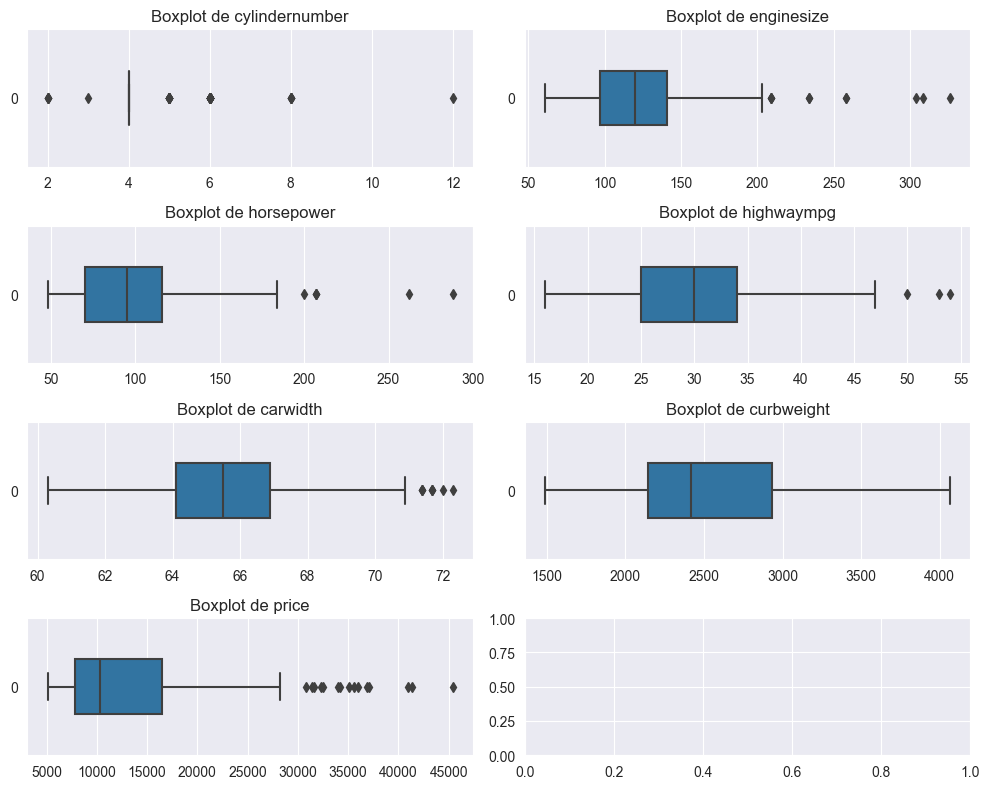

In [136]:
# Crear los subplots, fig representa la figura completa mientras que axes representa la posición en la figura.
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 8))

# Iterar sobre los subplots y las columnas
for ax, column in zip(axes.flatten(), df):
    sns.boxplot(data=df[column], orient="h", width=0.4, ax=ax)
    ax.set_title(f"Boxplot de {column}")

plt.tight_layout()
plt.show()

### Análisis de correlación

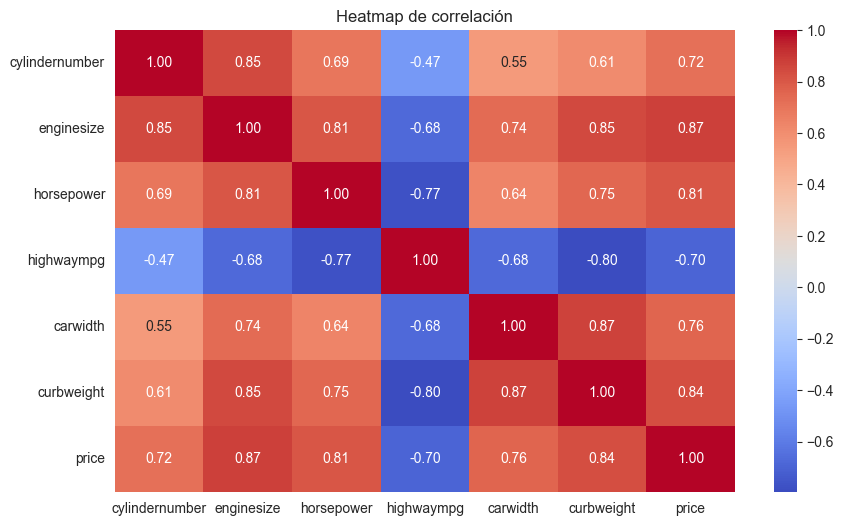

In [137]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap de correlación')
plt.show()

### Distribuciones

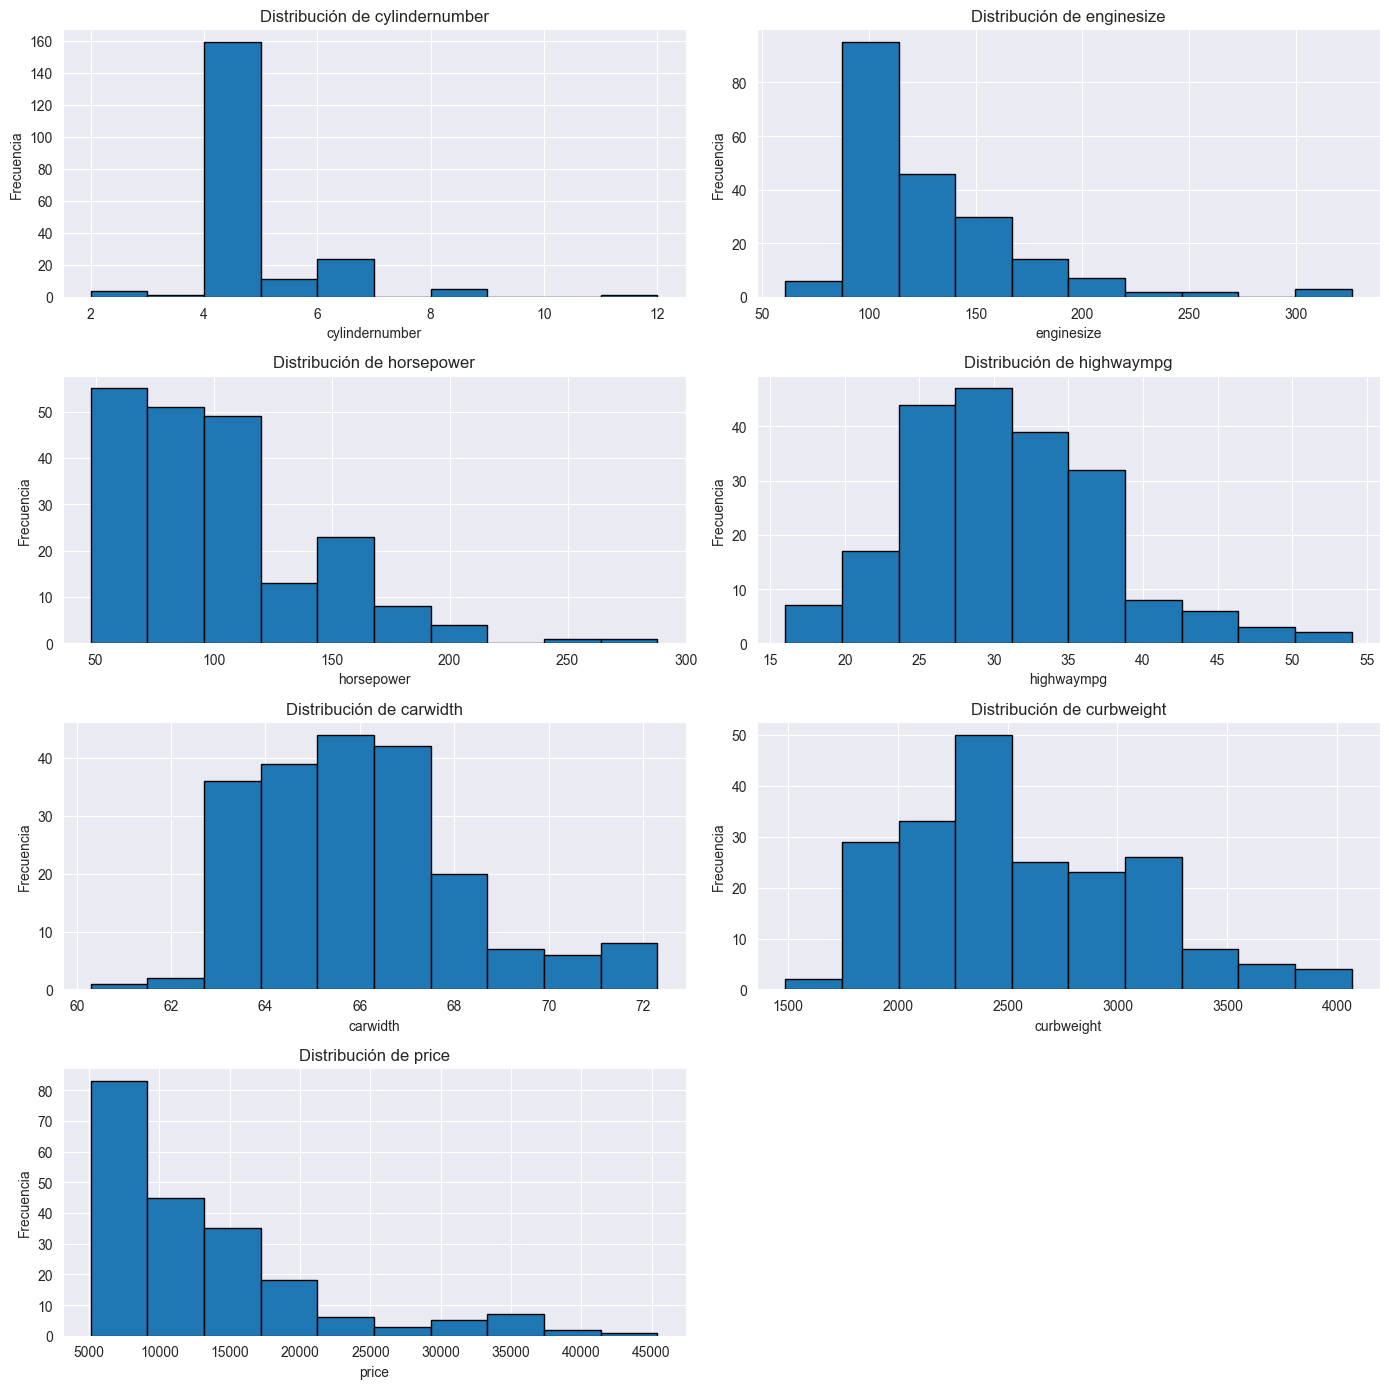

In [138]:
# Configurar el tamaño del gráfico
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 7 * 2))

# Aplanar el array de ejes para facilitar su manejo
axes = axes.flatten()

# Dibujar los histogramas
for i, col in enumerate(df.columns):
    axes[i].hist(df[col], bins=10, edgecolor='black')
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')

# Eliminar cualquier eje sobrante
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


### Eliminar los datos influyentes

In [139]:
X = df.drop('price', axis=1)
y = df['price']

# Constante (intercepto) a las variables independientes
X = sm.add_constant(X)

# Ajusta el modelo de regresión
model = sm.OLS(y, X).fit()

# Medidas de influencia
influence = model.get_influence()

# Valores de Cook's distance
cooks_d, _ = influence.cooks_distance

# Umbral comúnmente usado es 4/n
n = len(y)
threshold = 4 / n

# Identifica los datos influyentes
influential_data = cooks_d > threshold

# Crea un nuevo DataFrame excluyendo los datos influyentes
influential_df = df[~influential_data]

# Mostrar el DataFrame limpio
print(influential_df)


     cylindernumber  enginesize  horsepower  highwaympg  carwidth  curbweight  \
0                 4         130         111          27      64.1        2548   
1                 4         130         111          27      64.1        2548   
2                 6         152         154          26      65.5        2823   
3                 4         109         102          30      66.2        2337   
4                 5         136         115          22      66.4        2824   
..              ...         ...         ...         ...       ...         ...   
200               4         141         114          28      68.9        2952   
201               4         141         160          25      68.8        3049   
202               6         173         134          23      68.9        3012   
203               6         145         106          27      68.9        3217   
204               4         141         114          25      68.9        3062   

       price  
0    13495.0

## Herramienta 1 - Regresión Lineal Simple 
Con base al comportamiento de los datos, se decidió utilizar una regresión lineal múltiple observando que las variables independientes tienen una relación lineal respecto la variable dependiente. No obstante, se tuvieron que realizar pruebas para verificar que se estuvieran cumpliendo los supuestos de Mínimos Cuadrados Ordinarios (OLS por sus siglas en inglés) y realizar ajustes a los datos para poder verdaderamente llevar a cabo el análisis con esta herramienta estadística. 

### Con datos influyentes

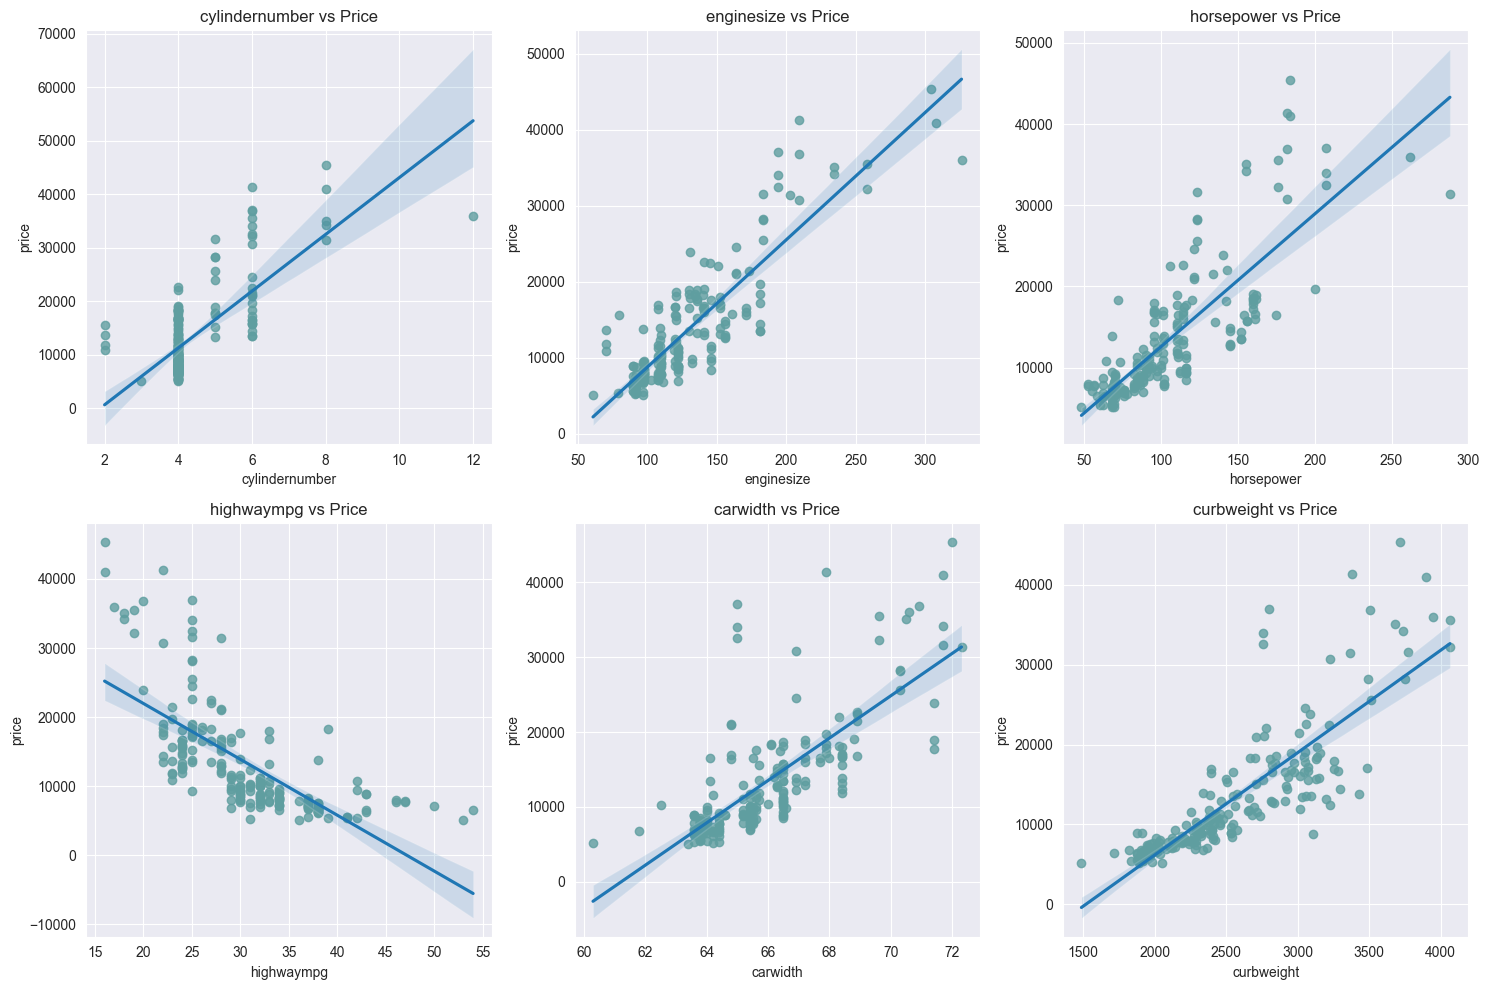

In [140]:
# Define las variables independientes y dependientes
X = df.drop('price', axis=1)
y = df['price']

n_filas = 2
n_cols = 3

# Crear una figura para los subgráficos
fig, axes = plt.subplots(n_filas, n_cols, figsize=(15, 10))

# Loop para crear un gráfico de regresión lineal simple para cada variable independiente
for i, var in enumerate(X):
    row = i // n_cols
    col = i % n_cols
    
        # Ajuste del modelo de regresión lineal simple
    X = df[var]
    y = df['price']
    X = sm.add_constant(X)  # Añadiendo una constante (intercepto)
    model = sm.OLS(y, X).fit()
    
    
    # Creación del gráfico de dispersión con puntos influyentes destacados
    sns.regplot(x=var, y='price', data=df, ax=axes[row, col], scatter_kws={'color': 'cadetblue'})
    axes[row, col].set_title(f'{var} vs Price')


# Ajustar el layout para evitar superposiciones
plt.tight_layout()

# Mostrar los gráficos
plt.show()

### Sin datos influyentes

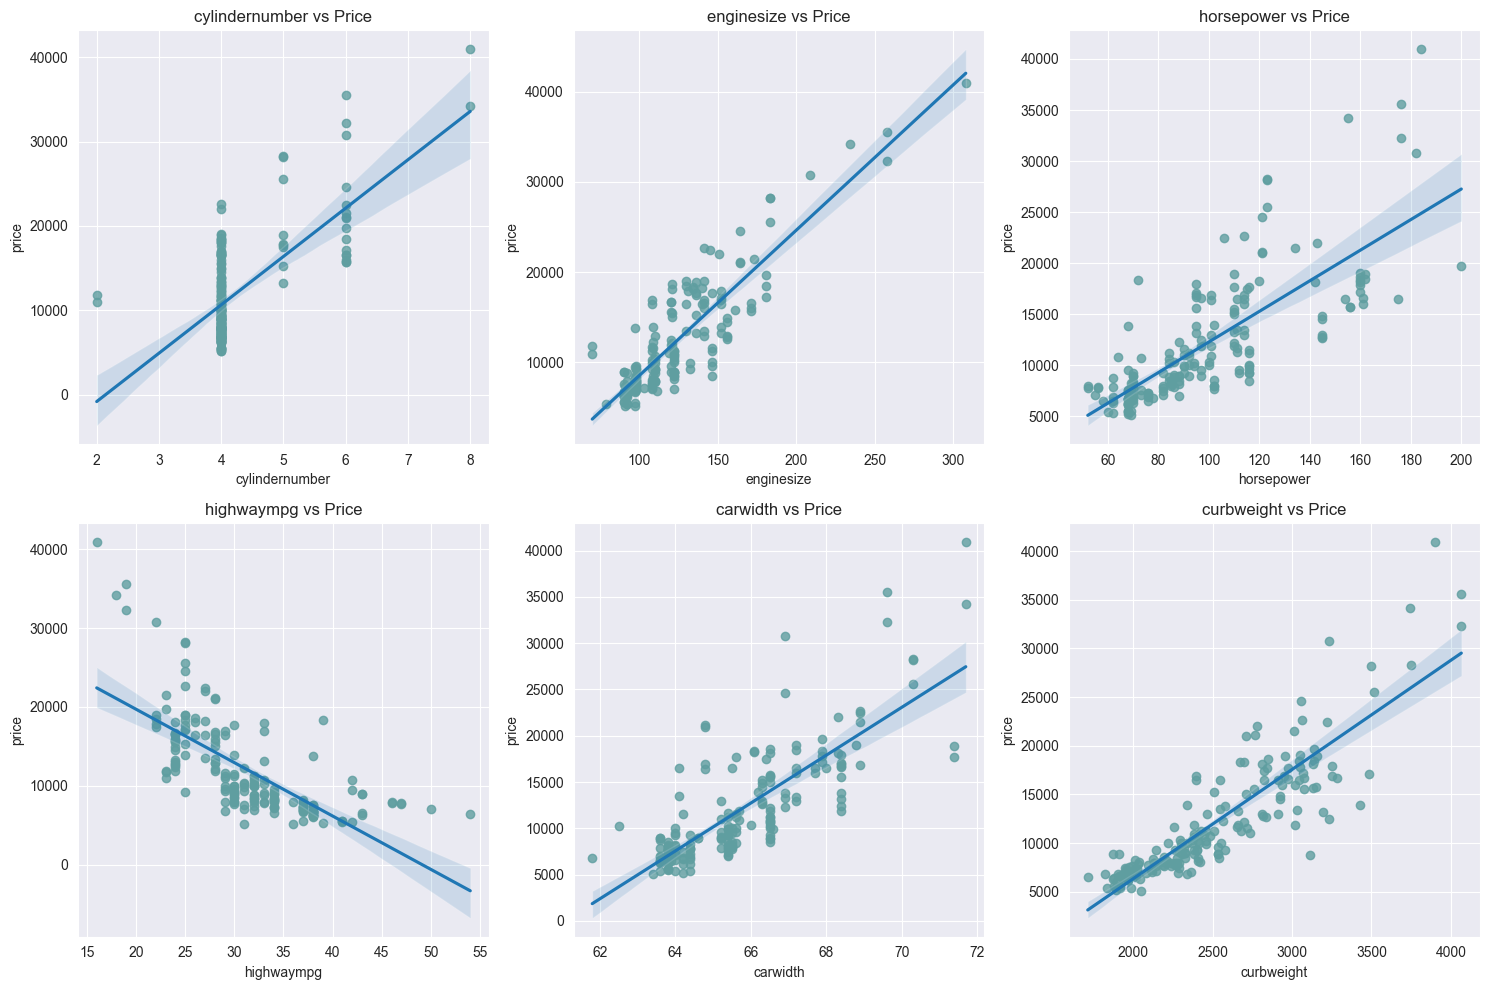

In [141]:
# Define las variables independientes y dependientes
X = influential_df.drop('price', axis=1)
y = influential_df['price']

n_filas = 2
n_cols = 3

# Crear una figura para los subgráficos
fig, axes = plt.subplots(n_filas, n_cols, figsize=(15, 10))

# Loop para crear un gráfico de regresión lineal simple para cada variable independiente
for i, var in enumerate(X):
    row = i // n_cols
    col = i % n_cols
    
        # Ajuste del modelo de regresión lineal simple
    X = influential_df[var]
    y = influential_df['price']
    X = sm.add_constant(X)  # Añadiendo una constante (intercepto)
    model = sm.OLS(y, X).fit()
    
    
    # Creación del gráfico de dispersión con puntos influyentes destacados
    sns.regplot(x=var, y='price', data=influential_df, ax=axes[row, col], scatter_kws={'color': 'cadetblue'})
    axes[row, col].set_title(f'{var} vs Price')


# Ajustar el layout para evitar superposiciones
plt.tight_layout()

# Mostrar los gráficos
plt.show()

### Análisis de la herramienta

La tabla observada a continuación nos presenta un resumen del desempeño del modelo donde se puede verificar el cumplimiento de los supuestos de Mínimos Cuadrados Ordinarias respectivamente. De acuerdo a los resultados obtenidos se determina a un 95% de confianza que el modelo puede explicar el 85.1% de los datos de la variable dependiente y que todas las variables son significativas a excepción de la variable "highwaympg". 

Dado lo anterior se consigue que las variables enginesize, carwidth, curbweigh, cylindernumber y horsepower son buenos estimadores en conjunto para que la empresa China realice una predicción del vehículo en cuestión y determine si puede entrar al mercado estadounidense y determinar su rentabilidad por consecuencia. 

La $R^2$ indica que las variables describen adecuadamente el comportamiento del precio y por lo tanto la empresa podrá tomar decisiones a partir de la ecuación que emite el mismo modelo.  

## Herramienta 2 - Prueba de hipótesis
Las pruebas de hipótesis permiten determinar qué variables deben permanecer en el modelo y, por el contrario, cuales no están aportando nada al mismo. Al establecer el valor de significancia (alpha=0.05) podemos obtener un nivel de confianza sobre los resultados que se están presentando. Al utilizar esta herramienta se pudieron hacer ajustes sobre las variables seleccionadas en el modelo y es por eso que se consideró pertinente su uso. 

### Con datos influyentes

In [142]:
X = df.drop('price', axis=1)
y = df['price']

# Añade una constante (intercepto) a tus variables independientes
X = sm.add_constant(X)

# Ajusta el modelo de regresión
model = sm.OLS(y, X).fit()

# Imprime el resumen del modelo, que incluye los p-valores para las pruebas de hipótesis sobre los coeficientes
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     150.4
Date:                Tue, 12 Sep 2023   Prob (F-statistic):           6.11e-71
Time:                        22:47:52   Log-Likelihood:                -1956.7
No. Observations:                 205   AIC:                             3927.
Df Residuals:                     198   BIC:                             3951.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -4.787e+04   1.33e+04     -3.

### Sin datos influyentes

In [143]:
X = influential_df.drop('price', axis=1)
y = influential_df['price']

# Añade una constante (intercepto) a tus variables independientes
X = sm.add_constant(X)

# Ajusta el modelo de regresión
model = sm.OLS(y, X).fit()

# Imprime el resumen del modelo, que incluye los p-valores para las pruebas de hipótesis sobre los coeficientes
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     172.7
Date:                Tue, 12 Sep 2023   Prob (F-statistic):           3.79e-72
Time:                        22:47:52   Log-Likelihood:                -1728.2
No. Observations:                 188   AIC:                             3470.
Df Residuals:                     181   BIC:                             3493.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -4.54e+04   1.09e+04     -4.

### Análisis de la herramienta

#### Análisis de los Coeficientes

##### Modelo con Todos los Datos

- **cylindernumber**: El coeficiente es 113.1838, pero tiene un p-valor muy alto (0.807), lo que indica que no es estadísticamente significativo al nivel de confianza del 95%.
- **enginesize**: Es significativo con un coeficiente de 79.5642 y un p-valor muy bajo.
- **horsepower**: También es significativo con un coeficiente de 52.2147.
- **highwaympg**: No es significativo con un p-valor de 0.633.
- **carwidth**: Es significativo con un coeficiente de 568.9752.
- **curbweight**: Tiene un p-valor de 0.070, lo que indica que está en el límite de la significancia.

##### Modelo sin Datos Influyentes

- **cylindernumber**: Se volvió significativo con un coeficiente más alto de 1414.7844.
- **enginesize**: Aunque el coeficiente disminuyó a 39.5202, sigue siendo significativo.
- **horsepower**: El coeficiente disminuyó a 21.5190 pero sigue siendo significativo.
- **highwaympg**: Continúa siendo no significativo con un p-valor muy alto.
- **carwidth**: Aunque el coeficiente disminuyó ligeramente, sigue siendo significativo.
- **curbweight**: Aumentó su significancia con un coeficiente de 4.8866.

#### Análisis de las Estadísticas de los Residuos y Métricas de Ajuste del Modelo

##### Ambos Modelos

- **R-squared**: El modelo sin datos influyentes tiene un R-squared más alto (0.851) en comparación con el modelo con todos los datos (0.820), lo que indica que explica una mayor proporción de la variabilidad en el precio.
- **Adjusted R-squared**: Similar al R-squared, es más alto en el modelo sin datos influyentes, lo que indica un mejor ajuste del modelo.
- **F-statistic**: Es más alto en el modelo sin datos influyentes, lo que indica que el modelo es más significativo estadísticamente.
- **Prob (F-statistic)**: Muy bajo en ambos modelos, lo que indica que los modelos son significativos.
- **Log-Likelihood, AIC, y BIC**: Estos indicadores muestran que el modelo sin datos influyentes es preferible ya que tiene un Log-Likelihood más alto y valores más bajos de AIC y BIC.

#### Conclusiones

- **Multicolinealidad**: En ambos modelos, el número de condición es bastante alto, lo que indica problemas potenciales de multicolinealidad. Esto sugiere que algunas de las variables independientes están correlacionadas, lo que puede afectar la precisión de los coeficientes estimados.
- **Normalidad de los Residuos**: Las pruebas Omnibus y Jarque-Bera indican que los residuos no están normalmente distribuidos, especialmente en el modelo con todos los datos.
- **Autocorrelación**: La estadística Durbin-Watson está más cerca de 2 en el modelo sin datos influyentes, lo que indica menos autocorrelación en comparación con el modelo con todos los datos.

- Para mejorar el ajuste del modelo con todos los datos, se podría borrar las variables no significativas (columnas de 'cylindernumber' y 'highwaympg' del DataFrame).
- Para mejorar el ajuste del modelo sin datos influyentes, se podría borrar la variable no significativa (columna de 'highwaympg' del DataFrame).

## Conclusión del análisis